
Ce code analyse les tailles, trace des histogrammes pour les tailles en ko, affiche les images les plus grandes et petites, et identifie les images avec des codes-barres pour les supprimer.

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import pyzbar.pyzbar as pyzbar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_folder = "/content/drive/MyDrive/OCR/Dataset/Images"

In [ ]:
cd /content/drive/MyDrive/OCR/Dataset/Images

/content/drive/MyDrive/OCR/Dataset/Images


In [ ]:
#ls

EXTRAIRE LES TAILLES EN KO MAX ET MIN

In [ ]:
max_size = 0
min_size = 10
num_images = 0

In [ ]:
sizes = []

for filename in os.listdir(img_folder):
    if filename.endswith('.jpg'):
        file_path = os.path.join(img_folder, filename)
        size_kb = round(os.path.getsize(file_path) / 1024, 2) #  la taille en ko
        sizes.append(size_kb)

        if size_kb > max_size:
            max_size = size_kb
            # la plus grande image
            mzx_size_img = file_path


        if size_kb < min_size:
            min_size = size_kb
            # la plus petite image
            min_size_img = file_path
            #print(min_size_img)

        num_images += 1

In [ ]:
min_size_img

'/content/drive/MyDrive/OCR/Dataset/Images/image_304754.jpg'

In [ ]:
print("Taille maximale : {} ko".format(max_size))
print("Taille minimale : {} ko".format(min_size))
print("Nombre total d'images : {}".format(num_images))

Taille maximale : 150.97 ko
Taille minimale : 0.16 ko
Nombre total d'images : 33752


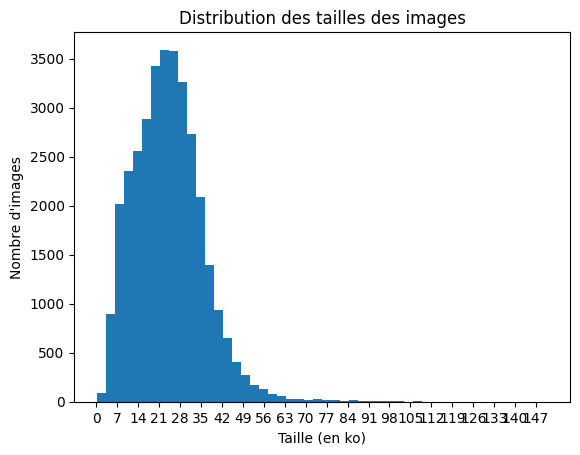

In [ ]:
plt.hist(sizes, bins=50)
plt.title("Distribution des tailles des images")
plt.xlabel("Taille (en ko)")
plt.ylabel("Nombre d'images")

plt.xticks(range(int(min_size), int(max_size), 7))

plt.show()

In [ ]:
#affichage de la plus grande et de la plus petite image
img = cv2.imread(min_size_img)
cv2_imshow(img)

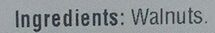

In [ ]:
img4= cv2.imread('/content/drive/MyDrive/OCR/Dataset/Images/image_341060.jpg')
cv2_imshow(img4)

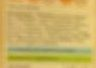

In [ ]:
imgs= cv2.imread('/content/drive/MyDrive/OCR/Dataset/Images/image_295258.jpg')
cv2_imshow(imgs)

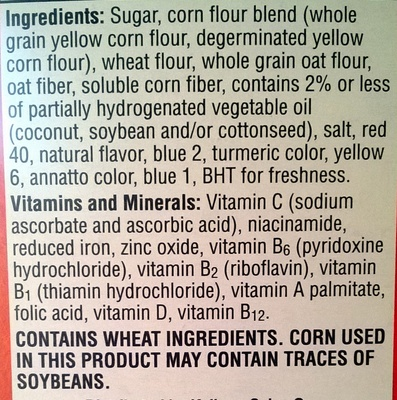

In [ ]:
img1 = cv2.imread(mzx_size_img)
cv2_imshow(img1)

DISTRIBUTION EN FONCTION DES TAILLES EN KO

In [ ]:
sizes = []

for filename in os.listdir(img_folder):
    if filename.endswith('.jpg'):
        file_path = os.path.join(img_folder, filename)
        size_kb = round(os.path.getsize(file_path) / 1024, 2) # obtenir la taille en ko
        sizes.append(size_kb)

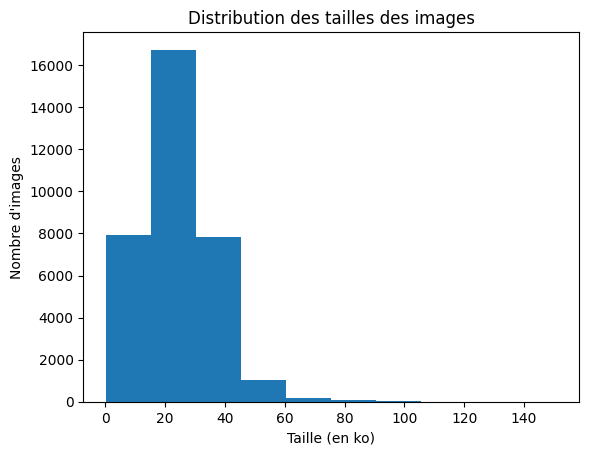

In [ ]:
plt.hist(sizes, bins=10)
plt.title("Distribution des tailles des images")
plt.xlabel("Taille (en ko)")
plt.ylabel("Nombre d'images")
plt.show()

HAUTEUR ET LARGEUR DES IMAGES

In [ ]:
heights = []
widths = []

In [ ]:
#HISTOGRAMME DE HAUTEURS
plt.hist(heights, bins=30)
plt.title("Distribution des hauteurs des images")
plt.xlabel("Hauteur")
plt.ylabel("Nombre d'images")
plt.show()

In [ ]:
#HISTOGRAMME DE LARGEURS
plt.hist(widths, bins=30)
plt.title("Distribution des largeurs des images")
plt.xlabel("Largeur")
plt.ylabel("Nombre d'images")
plt.show()

CODE BARRE

In [ ]:
!pip install pyzbar opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get install libzbar0


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libzbar0 is already the newest version (0.23-1.3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


In [ ]:
img_folder = '/content/drive/MyDrive/OCR/codebarre'

In [ ]:
# Liste des noms de fichiers dans le dossier
files = os.listdir(img_folder)

In [ ]:
print(files)

['image_252069.jpg', 'image_332153.jpg', 'Etiquette-codebarre.jpg']


In [ ]:
cd /content/drive/MyDrive/OCR/codebarre

/content/drive/MyDrive/OCR/codebarre


identifier les images avec code barre

In [ ]:
# Liste des noms de fichiers dans le dossier
files = os.listdir(img_folder)

In [ ]:
barcode_images_file = open("barcode_images.txt", "w")
bd = cv2.barcode.BarcodeDetector()
folder_path ='/content/drive/MyDrive/OCR/Dataset/Images'
image_files = os.listdir(folder_path)

In [ ]:
for image_file in image_files:
    try:
        image_path = os.path.join(folder_path, image_file)
        image = cv2.imread(image_path)

        retval, decoded_info, decoded_type, points = bd.detectAndDecode(image)

        if retval :
          print('hello')
          print(decoded_info)
          barcode_images_file.write(image_file + '\n')

    except Exception as e:
        print(f"Error processing image {image_file}: {e}")

barcode_images_file.close()

hello
('077900001826',)
hello
('077900335174',)
hello
('078000021707', '')
hello
('078000152463',)
hello
('078255003169',)
hello
('078665001038', '')
hello
('078742004938',)
hello
('078742030456',)
hello
('078742041018',)
hello
('078742050287',)
hello
('078742067100',)
hello
('078742100159',)
hello
('078742117706',)
hello
('078742131672',)
hello
('02148809',)
hello
('078742153865',)
hello
('078742222356',)
hello
('078742230382',)
hello
('078742236025',)
hello
('078742236988',)
hello
('078742247939',)
hello
('078742248851',)
hello
('78741256',)
hello
('078742275796',)
hello
('078742314617',)
Error processing image barcode_images.txt: OpenCV(4.7.0) /io/opencv_contrib/modules/barcode/src/barcode.cpp:20: error: (-215:Assertion failed) !img.empty() in function 'checkBarInputImage'

hello
('075609041914',)
hello
('075669126200',)
hello
('075879001519',)
hello
('076183163788',)
hello
('41970041',)
hello
('076310005554',)
hello
('076371012218',)
hello
('050625270364',)
hello
('076750262067',)
